In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

In [3]:
import os
import math

import numpy
import pandas
import librosa
import soundfile

from matplotlib import pyplot as plt
import librosa.display

from brewaed import utils, labels, beerbubble
import brewaed



In [5]:
def load_dataset(path):
    df = pandas.read_csv(path)
    df = df.set_index('id')
    
    return df

data_dir = '../data'
files_path = os.path.join(data_dir, 'files.csv')

files = load_dataset(files_path)
files['path'] = os.path.join(data_dir, 'audio') + os.path.sep + files.filename 
files

,youtube_url,filename,path
id,,,
MN0Mg1uyznU,https://www.youtube.com/watch?v=MN0Mg1uyznU,ASMR _ Homebrewing Airlock Symphony 🍺🎼 Soothin...,../data/audio/ASMR _ Homebrewing Airlock Symph...
by0e-EkAsOE,https://www.youtube.com/watch?v=by0e-EkAsOE,One hour of apple wine airlock bubbling-by0e-E...,../data/audio/One hour of apple wine airlock b...
q2srYoC3FOo,https://www.youtube.com/watch?v=q2srYoC3FOo,Bubbling airlock on pear cider-q2srYoC3FOo.m4a,../data/audio/Bubbling airlock on pear cider-q...
p0jtxp5nWms,https://www.youtube.com/watch?v=p0jtxp5nWms,Watch an Airlock Bubbling During Mead Fermenta...,../data/audio/Watch an Airlock Bubbling During...


In [7]:
label_dir = os.path.join(data_dir, 'labels')

def get_id_from_labelpath(p):
    f = os.path.basename(p)
    prefix, id = f.split('.')
    assert prefix == 'labels', prefix
    return id

def load_labels(label_dir):

    paths = [ os.path.join(label_dir, f) for f in os.listdir(label_dir) ]

    ids = list(map(get_id_from_labelpath, paths))
    
    files = pandas.DataFrame({
        'path': paths,
        'id': ids,
    }).set_index('id')
    
    labels = files.groupby(by='id').apply(lambda r: brewaed.labels.read(r.path.iloc[0]))
    
    return labels

ll = load_labels(label_dir)
ll
#brewaed.labels.read(ll.path.iloc[0])




start        end annotation
id                                            
MN0Mg1uyznU 59   0.51200   0.896000          p
            97   0.89600   1.024000          p
            0    1.47978   1.721756          p
            98   1.79200   1.920000          p
            99   2.68800   2.816000          p
...                  ...        ...        ...
q2srYoC3FOo 9   37.37600  37.760000          p
            10  44.41600  44.672000          p
            11  51.07200  51.328000          p
            12  56.83200  56.960000          n
            13  57.60000  57.984000          p

[215 rows x 3 columns]

In [8]:
def load_mfcc(audio, times):

    ff = librosa.feature.mfcc(audio, sr=sr, hop_length=feature_hop, n_fft=feature_fft, n_mfcc=13) 
    delta = librosa.feature.delta(ff, width=7, order=1)
    ff = numpy.concatenate([ff, delta], axis=0)


In [9]:

feat = pandas.DataFrame(ff.T, index=t)
feat.columns = [ f'MFCC{i}' for i in feat.columns ]
feat['event'] = dense
feat

NameError: name 'ff' is not defined

In [10]:

def build_model():
    
    import sklearn.pipeline
    import sklearn.preprocessing
    import sklearn.linear_model
    import sklearn.svm
    import sklearn.neighbors
    from sklearn.compose import make_column_transformer
    from sklearn.compose import make_column_selector

    model = sklearn.pipeline.Pipeline([
        ('scale', sklearn.preprocessing.StandardScaler()),
        ('classifier', sklearn.linear_model.LogisticRegression()),
    ])

    return model

m = build_model()

feature_columns = [ c for c in feat.columns if c.startswith('MFCC') ]
m.fit(feat[feature_columns], feat[['event']])

NameError: name 'feat' is not defined

In [174]:
Y_pred = m.predict(feat[feature_columns])
Y_pred.mean()

0.05716723549488054

In [175]:
import sklearn.metrics
sklearn.metrics.f1_score(feat[['event']], Y_pred)


0.9924812030075187

In [179]:
# TODO: put labeling code into a single function. Run for each input file
# TODO: setup test/val/train. Cross-validation with grouped split

pred = pandas.DataFrame({
  'probability': Y_pred,
}, index=feat.index)
pred

,probability
0.000,0
0.256,0
0.512,0
0.768,0
1.024,0
...,...
298.752,0
299.008,0
299.264,0
299.520,0


array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'probability'}>]], dtype=object)

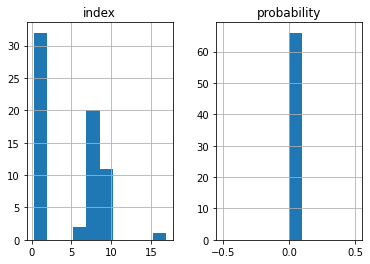

In [184]:
pred[pred.probability == 1].reset_index().diff().hist()

In [348]:
        
pred['class'] = (pred.probability > 0.5).astype(int)
merged = utils.merge_consecutive(pred, col='class')
merged
merged[merged['class'] == 1]

,start,end,class
1,3.072,3.584,1
3,11.264,11.520,1
5,19.456,19.968,1
7,28.416,28.672,1
9,35.840,36.352,1
11,43.776,44.288,1
13,52.736,53.248,1
15,61.696,62.208,1
17,70.144,70.656,1
19,77.312,77.824,1


<AxesSubplot:>

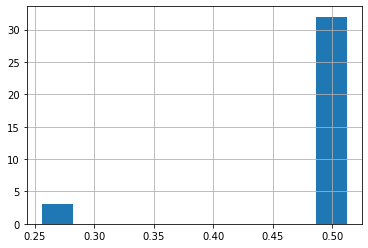

In [213]:
pos = merged[merged['class'] == 1]
(pos['end']-pos['start']).hist()